<h3>Linear regression</h3>
<p>We start by loading the red wine's data</p>

In [57]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
q = data[:,11]

In [58]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 'winequality-white.csv')
import numpy as np
with open('winequality-white.csv') as fw:
    lines_white = (line for line in fw)
    data_white = np.loadtxt(lines_white, delimiter=';', skiprows=1)
q_white = data_white[:,11]

<h4>Plotting</h4>
<p>It's useful to start with a plot. Histogram of the quality, for the red wine data.</p>

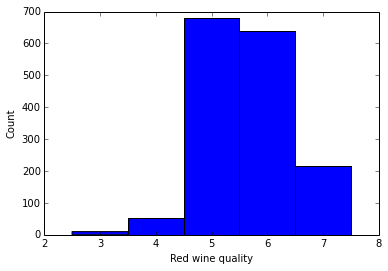

In [59]:
%matplotlib inline
import pylab as plt
plt.hist(q, bins=np.arange(q.min(), q.max()+1), align='left')
plt.xlabel('Red wine quality')
plt.ylabel('Count')

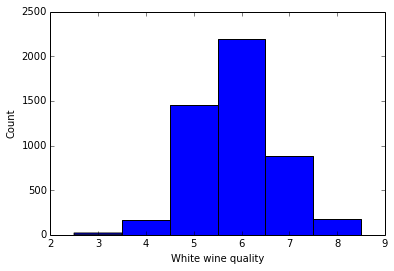

In [60]:
%matplotlib inline
import pylab as plt
plt.hist(q_white, bins=np.arange(q_white.min(), q_white.max()+1), align='left')
plt.xlabel('White wine quality')
plt.ylabel('Count')

Linear regression with minimised square loss. Mean Square Error = 0.455662899278


0.45566289927787468

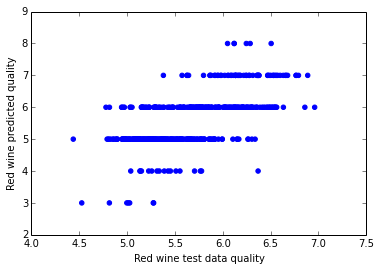

In [61]:
def fitLinearModelAndGetSquareError(showPlot, k):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data)

    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    X_train = train[:,:11]
    X_train = X_train **(k)
    X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
    q_train = train[:,11]
    #data is now splitted into train and test
    
    from numpy.linalg import inv
    XtX = np.dot(X_train.T, X_train) 
    XtXI = inv(XtX)
    XtXIXt = np.dot(XtXI, X_train.T)
    wbar = np.dot(XtXIXt, q_train)
    #optimal values for the wbar are now found. For these values we are minimizing the Loss agianst the train data

    #now plotting the new fitted model
    X_test = test[:,:11]
    X_test = X_test **(k)
    X_test = np.c_[np.ones(test.shape[0]), X_test]
    q_test = test[:,11]
    f_test = np.dot(X_test, wbar)
    
    meanSquareError = ((q_test-f_test)**2).mean()
    if showPlot:
        print "Linear regression with minimised square loss. Mean Square Error =", meanSquareError
        plt.scatter(f_test,q_test, color='blue')
        plt.xlabel('Red wine test data quality')
        plt.ylabel('Red wine predicted quality')
    return meanSquareError
fitLinearModelAndGetSquareError(True,1)

(array([   8.,   28.,  146.,  388.,  545.,  491.,  281.,   91.,   16.,    6.]),
 array([ 0.33370023,  0.35296898,  0.37223772,  0.39150647,  0.41077522,
         0.43004397,  0.44931272,  0.46858147,  0.48785022,  0.50711897,
         0.52638771]),
 <a list of 10 Patch objects>)

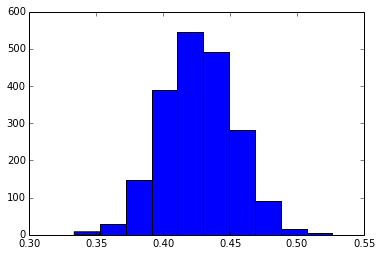

In [66]:
errors = []
for i in range(2000):
    errors += [fitLinearModelAndGetSquareError(False, 1)]
plt.hist(errors)

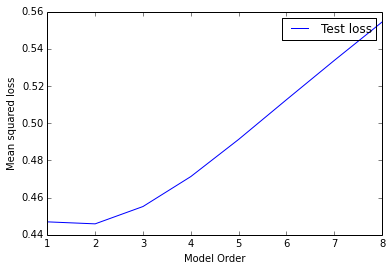

In [56]:
max_order = 7
runs = 100
error_runs = np.zeros((max_order+1,100))
errors = []
orders = [i+1 for i in range(max_order+1)]

for k in range(max_order+1):
    for i in range(100):
        err = fitLinearModelAndGetSquareError(False, k+1)
        error_runs[k,i] = err

plt.figure()
plt.plot(np.array(orders),error_runs.mean(axis=1),'b-',label="Test loss")
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('Mean squared loss')    

In [43]:
a = np.array([[1,2,3],[4,5,6]])
print a.sum(axis=0)

[5 7 9]
